In [1]:
import glob
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_dir = '/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks'

In [3]:
csv_files = glob.glob(data_dir + '/data*.csv')
for file in csv_files:
    print(file)

/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_RP_test.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_RP_training.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_4_analysis_RP_pretest.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_4_analysis_RP_training.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_4_analysis_RP_test.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_RP_training_clean.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_RP_pretest_clean.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_RP_test_clean.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_quest_clean.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_RP_pretest.csv
/Users/hugofluhr/phd_local/data/RR/preproc/habits_tasks/data_4_analysis_RP_ratings.csv


In [4]:
def load_preproc_data(data_dir):
    test_data = pd.read_csv(data_dir + '/data_RP_test_clean.csv')
    train_data = pd.read_csv(data_dir + '/data_RP_training_clean.csv')
    test_data['trial'] = test_data['trial'].astype(int)
    train_data['trial'] = train_data['trial'].astype(int)

    train_data.set_index(['ID', 'session', 'trial'], inplace=True)
    test_data.set_index(['ID', 'session', 'trial'], inplace=True)
    return train_data, test_data

In [10]:
train_data, test_data = load_preproc_data(data_dir)

In [19]:
train_data['stim1']==1

ID      session  trial
E11T9A  1        1        False
                 3        False
                 4        False
                 5        False
                 6        False
                          ...  
ö07y2i  5        155      False
                 156      False
                 157      False
                 158      False
                 160      False
Name: stim1, Length: 177747, dtype: bool

In [43]:
filtered_rows = train_data[(train_data.index.get_level_values(0) == 'E11T9A') & (train_data['stim1'].isin([3, 5])) & (train_data['stim2'].isin([3, 5]))]
filtered_rows

phase  stim1  stim2 action  stim_chosen  \
ID     session trial                                               
E11T9A 1       12     training      5      3  right            3   
               55     training      5      3  right            3   
               60     training      3      5   left            3   
               68     training      3      5  right            5   
               95     training      5      3   left            5   
               102    training      3      5  right            5   
               114    training      5      3  right            3   
               144    training      5      3   left            5   
               159    training      3      5  right            5   
       2       12     training      5      3   left            5   
               22     training      3      5   left            3   
               55     training      5      3   left            5   
               60     training      3      5  right            5   
               68     training      3      5  right            5   
               95     training      5      3  right            3   
               102    training      3      5  right            5   
               114    training      5      3   left            5   
               144    training      5      3   left            5   
               159    training      3      5   left            3   
       3       12     training      5      3   left            5   
               22     training      3      5  right            5   
               55     training      5      3   left            5   
               60     training      3      5  right            5   
               68     training      3      5  right            5   
               95     training      5      3   left            5   
               102    training      3      5  right            5   
               114    training      5      3  right            3   
               144    training      5      3   left            5   
               159    training      3      5   left            3   
       4       12     training      5      3   left            5   
               22     training      3      5  right            5   
               55     training      5      3   left            5   
               60     training      3      5  right            5   
               68     training      3      5  right            5   
               95     training      5      3   left            5   
               102    training      3      5  right            5   
               114    training      5      3  right            3   
               144    training      5      3   left            5   
               159    training      3      5  right            5   
       5       12     training      5      3   left            5   
               22     training      3      5  right            5   
               55     training      5      3   left            5   
               60     training      3      5  right            5   
               68     training      3      5  right            5   
               95     training      5      3   left            5   
               102    training      3      5  right            5   
               114    training      5      3   left            5   
               144    training      5      3   left            5   
               159    training      3      5  right            5   

                      stim_unchosen  stim_rawID_chosen       rt1  reward1  \
ID     session trial                                                        
E11T9A 1       12                 5                  2  0.269604        3   
               55                 5                  2  0.447597        3   
               60                 5                  2  0.374814        2   
               68                 3                 11  0.562117        2   
               95                 3                 11  0.502787        3   
               10

In [7]:
train_subj = train_data.index.get_level_values(0).unique().tolist()
test_subj = test_data.index.get_level_values(0).unique().tolist()
assert train_subj == test_subj
subjects = train_subj

In [8]:
print('Number of subjects: ', len(subjects))
print('Number of trials in train data: ', train_data.shape[0])
print('Number of trials in test data: ', test_data.shape[0])
print('Number of trials per subject in train data: ', train_data.groupby('ID', observed=True).size().mean())
print('Number of trials per subject in test data: ', test_data.groupby('ID', observed=True).size().mean())

Number of subjects:  231
Number of trials in train data:  177747
Number of trials in test data:  30678
Number of trials per subject in train data:  769.4675324675325
Number of trials per subject in test data:  132.80519480519482


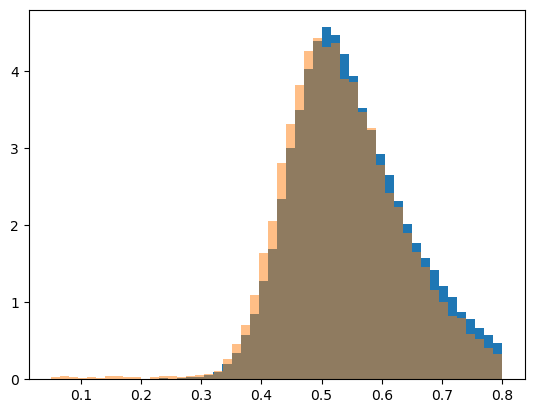

In [9]:
plt.hist(train_data.rt1, bins=50, density=True);
plt.hist(test_data.rt1, bins=50, density=True, alpha=0.5);

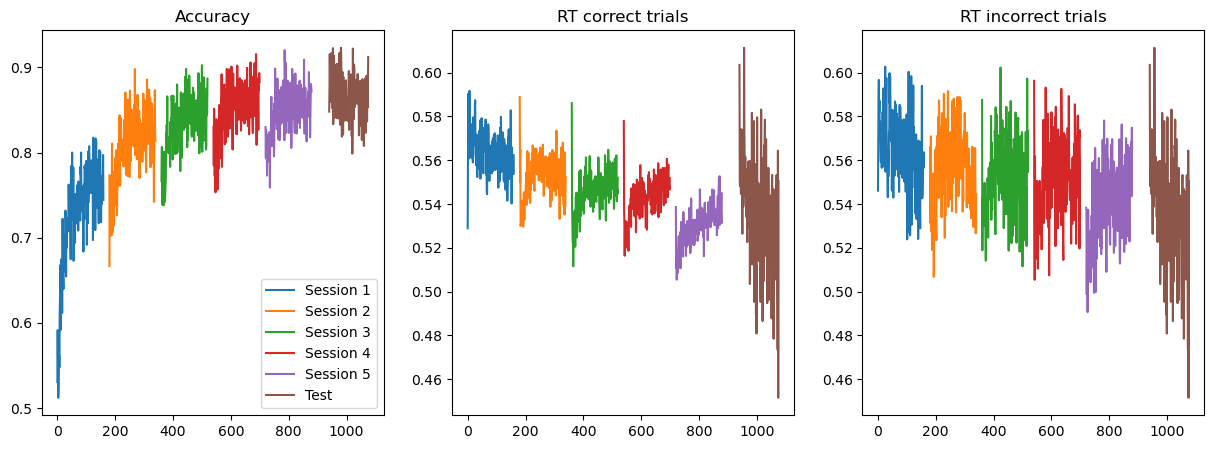

In [10]:
fig,axs = plt.subplots(1,3, figsize=(15,5))

for s in range(5):
    axs[0].plot(np.arange(160)+s*180,train_data.xs(s+1, level='session').groupby('trial')['corr_choice'].mean())
    axs[1].plot(np.arange(160)+s*180,train_data[train_data.corr_choice==1].xs(s+1, level='session').groupby('trial')['rt1'].mean())
    axs[2].plot(np.arange(160)+s*180,train_data[train_data.corr_choice==0].xs(s+1, level='session').groupby('trial')['rt1'].mean())
axs[0].plot(np.arange(136)+5*180+40,test_data.xs(s+1, level='session').groupby('trial')['corr_choice'].mean())
axs[1].plot(np.arange(136)+5*180+40,test_data[test_data.corr_choice==0].xs(s+1, level='session').groupby('trial')['rt1'].mean())
axs[2].plot(np.arange(136)+5*180+40,test_data[test_data.corr_choice==0].xs(s+1, level='session').groupby('trial')['rt1'].mean())

axs[0].legend(['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5','Test'])
axs[0].set_title('Accuracy')
axs[1].set_title('RT correct trials')
axs[2].set_title('RT incorrect trials')
plt.show()


## Comparing RT variability between correct and incorrect choices
Correct trials have lower variability of Response Time --> Automaticity?

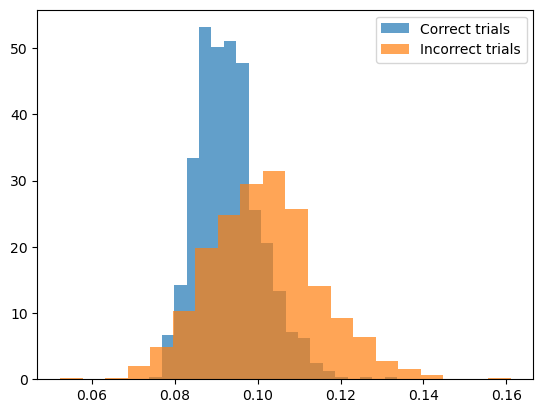

In [90]:
rt_correct_std = train_data[train_data.corr_choice==1].groupby(['trial', 'session'])['rt1'].std()
rt_incorrect_std = train_data[train_data.corr_choice==0].groupby(['trial', 'session'])['rt1'].std()
plt.hist(rt_correct_std, bins=20, density=True, alpha=0.7)
plt.hist(rt_incorrect_std, bins=20, density=True, alpha=0.7);
plt.legend(['Correct trials', 'Incorrect trials'])
plt.show()